In [1]:
# Heavenly Chocolates Website Transactions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# read data file
df = pd.read_excel('C:\\Chocolates_data.xlsx')

In [9]:
# snapshot of data
df.head(5)

,Customer,Day,Browser,Time (min),Pages Viewed,Amount Spent ($)
0,1,Mon,Internet Explorer,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Internet Explorer,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Internet Explorer,11.3,4,66.27


In [5]:
# data variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer     50 non-null     int64  
 1   Day          50 non-null     object 
 2   Browser      50 non-null     object 
 3   time_min     50 non-null     float64
 4   PagesViewed  50 non-null     int64  
 5   AmountSpent  50 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [6]:
# delete column 1
df = df.drop('Customer', 1)

In [7]:
# numeric data summary
df.describe()

,time_min,PagesViewed,AmountSpent
count,50.000000,50.000000,50.000000
mean,12.810000,4.820000,68.128200
std,6.063314,2.037305,32.343758
min,4.300000,2.000000,17.840000
25%,8.650000,3.250000,45.560000
50%,11.400000,4.500000,62.150000
75%,14.900000,6.000000,82.735000
max,32.900000,10.000000,158.510000


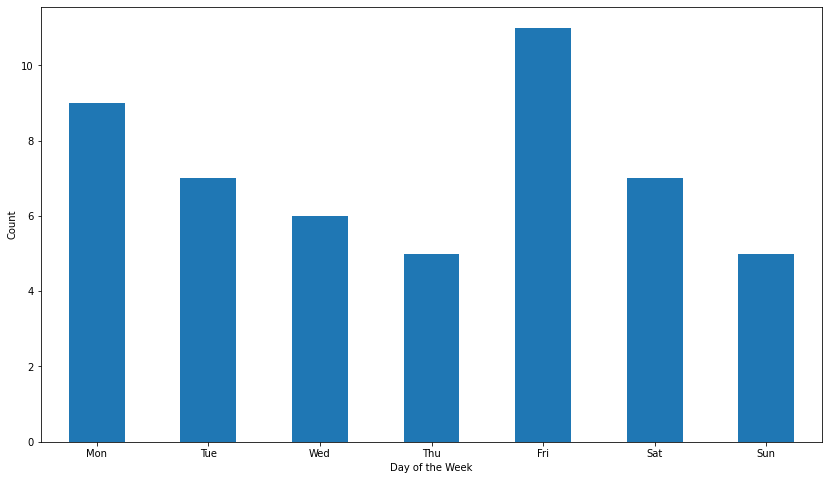

In [8]:
# frequency count by Day

Day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df['Day'] = pd.Categorical(df['Day'], categories=Day, ordered=True)

fig, ax = plt.subplots()
df.groupby(df["Day"]).size().plot(kind='bar',figsize=(14,8),rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

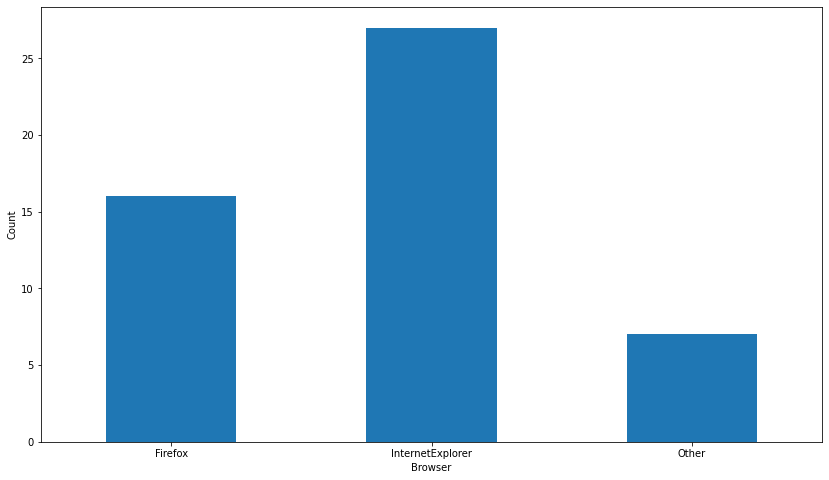

In [9]:
# Frequency count by browser type

df["Browser"] = df["Browser"].astype('category')
fig, ax = plt.subplots()

df.groupby(df["Browser"]).size().plot(kind='bar',figsize=(14,8),rot=0)
plt.xlabel('Browser')
plt.ylabel('Count')
plt.show()

In [10]:
# frequency, the total dollars spent, and the mean amount spent per transaction for day of the week

df.groupby('Day').agg(['count', 'sum', 'mean'])

time_min                   PagesViewed               AmountSpent          \
       count    sum       mean       count sum      mean       count     sum   
Day                                                                            
Mon        9  137.9  15.322222           9  58  6.444444           9  813.38   
Tue        7   88.6  12.657143           7  28  4.000000           7  414.86   
Wed        6   74.6  12.433333           6  25  4.166667           6  341.82   
Thu        5   54.3  10.860000           5  19  3.800000           5  294.03   
Fri       11  135.5  12.318182          11  53  4.818182          11  945.43   
Sat        7   92.4  13.200000           7  37  5.285714           7  378.74   
Sun        5   57.2  11.440000           5  21  4.200000           5  218.15   

                
          mean  
Day             
Mon  90.375556  
Tue  59.265714  
Wed  56.970000  
Thu  58.806000  
Fri  85.948182  
Sat  54.105714  
Sun  43.630000

In [11]:
# frequency, the total dollars spent, and the mean amount spent per transaction for each type of browser

df.groupby('Browser').agg(['count', 'sum', 'mean'])

time_min                   PagesViewed                \
                    count    sum       mean       count  sum     mean   
Browser                                                                 
Firefox                16  215.6  13.475000          16   81  5.06250   
InternetExplorer       27  339.8  12.585185          27  118  4.37037   
Other                   7   85.1  12.157143           7   42  6.00000   

                 AmountSpent                      
                       count      sum       mean  
Browser                                           
Firefox                   16  1228.21  76.763125  
InternetExplorer          27  1656.81  61.363333  
Other                      7   521.39  74.484286

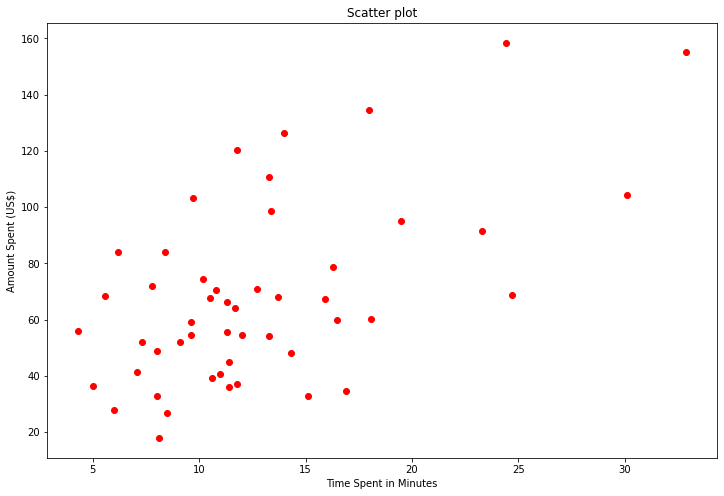

In [12]:
# Scatter plot between Time Spent in Minutes and Amount Spent (US$)

plt.figure(figsize=(12,8))
plt.scatter(x=df['time_min'], y=df["AmountSpent"],color = "red")
plt.title('Scatter plot')
plt.xlabel('Time Spent in Minutes')
plt.ylabel('Amount Spent (US$)')
plt.show()

In [13]:
# Pearson correlation coefficient between Time Spent in Minutes and Amount Spent (US$)

print("Pearson correlation coefficient between Time Spent in Minutes and Amount Spent (US$): ")
print(df['time_min'].corr(df["AmountSpent"],method="pearson"))

Pearson correlation coefficient between Time Spent in Minutes and Amount Spent (US$): 
0.580047615980413


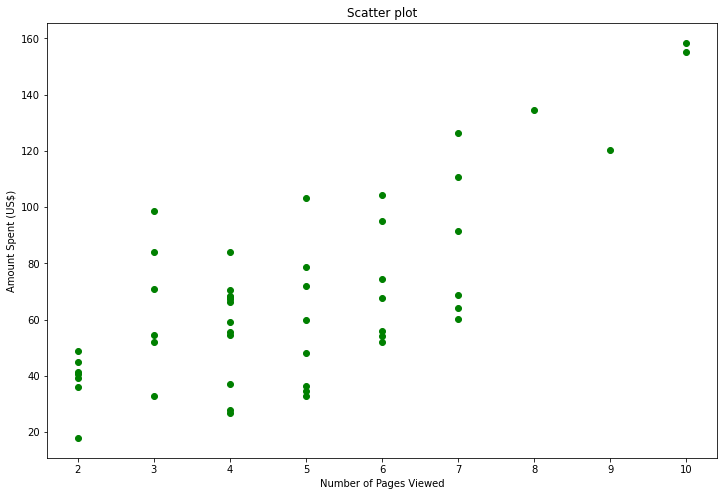

In [14]:
# Scatter plot between Number of Pages Viewed and Amount Spent (US$)

plt.figure(figsize=(12,8))
plt.scatter(x=df['PagesViewed'], y=df["AmountSpent"],color = "green")
plt.title('Scatter plot')
plt.xlabel('Number of Pages Viewed')
plt.ylabel('Amount Spent (US$)')
plt.show()

In [15]:
print("Pearson correlation coefficient between Number of Pages Viewed and Amount Spent (US$): ")
print(df['PagesViewed'].corr(df["AmountSpent"], method = "pearson"))

Pearson correlation coefficient between Number of Pages Viewed and Amount Spent (US$): 
0.723666923476961


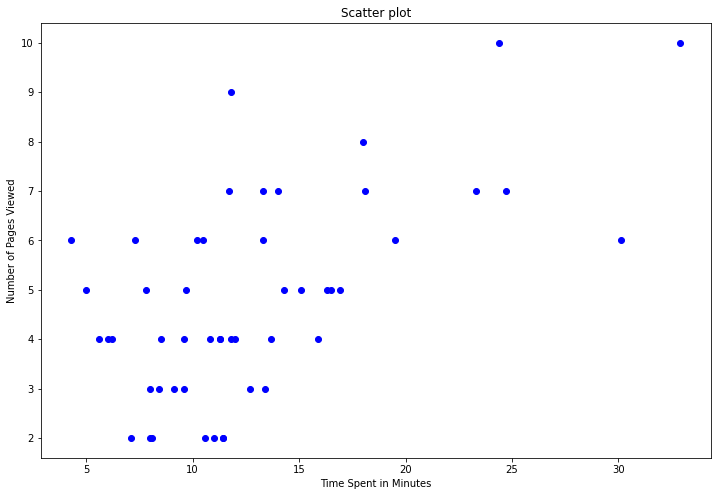

In [16]:
# Scatter plot between Time Spent in Minutes and Number of Pages Viewed

plt.figure(figsize=(12,8))
plt.scatter(x = df['time_min'],y=df['PagesViewed'], color = "blue")
plt.title('Scatter plot')
plt.xlabel('Time Spent in Minutes')
plt.ylabel('Number of Pages Viewed')

plt.show()

In [17]:
print("Pearson correlation coefficient between Number of Pages Viewed and Time Spent in Minutes: ")
print(df['PagesViewed'].corr(df["time_min"]))

Pearson correlation coefficient between Number of Pages Viewed and Time Spent in Minutes: 
0.5955675236548259


In [ ]:
import requests
from bs4 import BeautifulSoup
#Used headers/agent because the request was timed out and asking for an agent. 
#Using following code we can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
response = requests.get("https://www.zomato.com/bangalore/top-restaurants",headers=headers)
content = response.content
soup = BeautifulSoup(content,"html.parser")
top_rest = soup.find_all("div",attrs={"class": "bb0 collections-grid col-l-16"})
list_tr = top_rest[0].find_all("div",attrs={"class": "col-s-8 col-l-1by3"})
list_rest =[]
for tr in list_tr:
    dataframe ={}
    dataframe["rest_name"] = (tr.find("div",attrs={"class": "res_title zblack bold nowrap"})).text.replace('\n', ' ')
    dataframe["rest_address"] = (tr.find("div",attrs={"class": "nowrap grey-text fontsize5 ttupper"})).text.replace('\n', ' ')
    dataframe["cuisine_type"] = (tr.find("div",attrs={"class":"nowrap grey-text"})).text.replace('\n', ' ')
    list_rest.append(dataframe)
list_rest

In [ ]:
import math